# Resumes & The Job Application Process

An increasing number of companies these days are using [Applicant Tracking Systems](https://en.wikipedia.org/wiki/Applicant_tracking_system) some popular examples (at the time of writing) being [lever](https://www.lever.co/) & [greenhouse](https://grow.greenhouse.io)

Many of these provide aggegrate summary views of candidates and job description fit based on keyword analysis and other techniques to aid in pre-screening, in a classic cat & mouse game there are now services where candidates can optimize their resumes against a job description specifically to game these systems such as [skillsyncer](https://skillsyncer.com/)

This jupyter notebook is a light hearted analysis of my resume, there are an exhaustive number of services that can do this far more thoroughly if you want to get serious about it


## Word Cloud

Simple word cloud based on the content of my resume

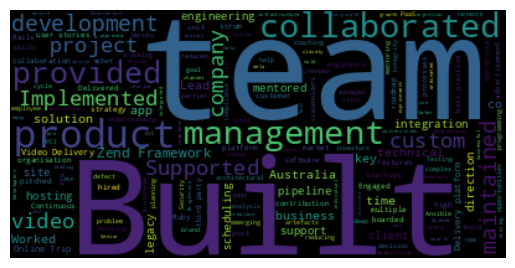

In [82]:
from wordcloud import WordCloud
import json
import matplotlib.pyplot as plt

# add additional stopwords
from wordcloud import STOPWORDS

STOPWORDS.update(['based', 'using', 'including', 'work', 'cms'])

resume = json.load(open('resume.clintp.json'))

all_highlights = map(lambda e: " ".join(e['highlights']), resume['work'])

word_cloud = WordCloud(stopwords=STOPWORDS).generate(" ".join(all_highlights))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Achievement Summary

My top three achievements ranked using [Latent_semantic_analysis](https://en.wikipedia.org/wiki/Latent_semantic_analysis)

In [86]:
import json
import matplotlib.pyplot as plt
import nltk

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


# download punkt
# see https://github.com/delip/PyTorchNLPBook/issues/14
nltk.download('punkt', quiet=True)

resume = json.load(open('resume.clintp.json'))

SUMY_LANGUAGE = 'english'
SUMY_SENTENCES_COUNT = 3

stemmer = Stemmer(SUMY_LANGUAGE)

summarizer = Summarizer(stemmer)
summarizer.stop_words = get_stop_words(SUMY_LANGUAGE)

achievements = ["\n".join(e['highlights']) for e in resume['work']]

parser = PlaintextParser.from_string("\n".join(achievements), Tokenizer(SUMY_LANGUAGE))

for sentence in summarizer(parser.document, SUMY_SENTENCES_COUNT):
  print(f"{sentence}\n")


Worked with some of Australia's most exciting emerging startups Developed strong problem-solving and critical thinking skills by identifying and addressing challenges facing early-stage startups Gained experience in business strategy, market analysis, and financial planning to help startups develop sustainable and scalable business models Built a diverse and global network of entrepreneurs, investors, and industry experts to share insights and best practices and create new opportunities for collaboration Honed skills in pitching and presenting to effectively communicate complex ideas and value propositions to investors, customers, and other stakeholders Developed a deep understanding of emerging technologies and trends and how they are reshaping industries and markets, enabling more informed decision-making and innovative thinking Random multiple campaigns to evaluate problem/solution fit Built a landing page & MVP Pitched to Antler & was accepted into the program Lead & managed a team

## Title Frequency Distribution

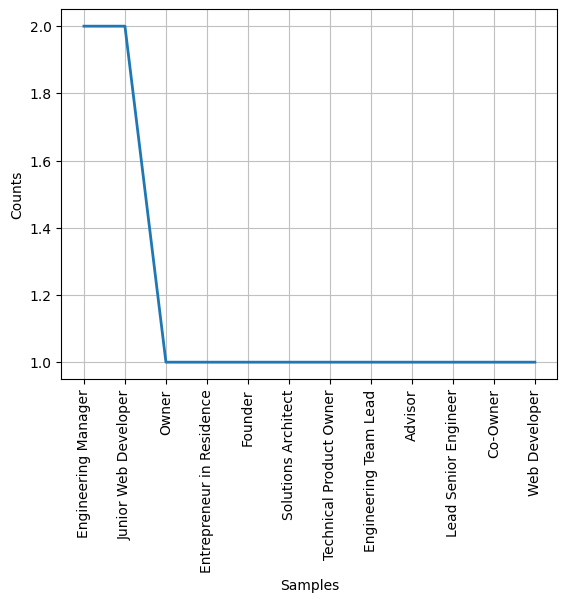

<Axes: xlabel='Samples', ylabel='Counts'>

In [51]:
import nltk
import json

def split_title(title): return [t.strip() for t in title.split('and')]

resume = json.load(open('resume.clintp.json'))

positions = [split_title(e['position']) for e in resume['work']]

flatten_titles = [j for sub in positions for j in sub] # flatten the array, I miss ruby's Array\#flatten

freq = nltk.FreqDist(flatten_titles)
freq.plot(20, cumulative=False)

## Readability Index

The [Gunning fog index](https://en.wikipedia.org/wiki/Gunning_fog_index) is a readability test for English writing. The index estimates the years of formal education a person needs to understand the text on the first reading

In [57]:
import json
from readability import Readability

resume = json.load(open('resume.clintp.json'))

achievements = ["\n".join(e['highlights']) for e in resume['work']]
r = Readability("\n".join(achievements))

gf = r.gunning_fog()
print(gf.grade_level)

college_graduate
